In [80]:
import datetime

In [81]:
import nltk
import string

In [82]:
import pandas as pd
import numpy as np

In [211]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [212]:
from collections import Counter

In [213]:
from imblearn.under_sampling import RandomUnderSampler

In [214]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# NLP Pipeline 

![](images/pipeline-walkthrough1.png)

Below is a to do list when converting text into vector form: 

**Clean text and Create a Bag of Words (BoW)**
>1. Lowercase the text
2. Tokenize 
3. Strip out punctuation or undesirable text
4. Remove Stopwords 
5. Stemming or Lemmatizing
6. Compute N-Grams
7. Use this to create BoW

**Vectorize BoW**
>8. Term Frequencies
9. Document Frequencies
10. TF-IDF
11. Normalize vectors

Let's go through both what each of these steps are and how to do them in python with the following corpus of comments about data science...
 

In [215]:
# function to vectorize the type_of_material series into a y target vector.

def vectorize_y_ser(ser):
    y = ser.copy()
    y.replace({'Op-Ed': 1,'News': 0}, inplace=True)
    return y

In [216]:
#rate of correct predictions out of total predictions

def metrics_(tn, fp, fn, tp):
    accuracy = (tp + tn) / (tn + fn + tp + fp)
    print(f'accuracy = {accuracy}')
    recall = (tp) / (tp + fn)
    print(f'recall = {recall}')
    precision = (tp) / (tp + fp)
    print(f'precision = {precision}')

In [217]:
#function that removes string.punctuation w/out the '?'
def punc_strip(string):
    my_lil_punc_string = '!"#$$%&\()*+,-./:;<=>@[\\]^_`{|}~'
    extras = '[\',.“-”’!—:()?@]$;"–/#|&‘°\\…%<‐+¡«»_•*>›=€·■♦£💃🏽∙≠{}¿😂¥̇̃★§🇺🇸©！💣。^‑🔥😡″̀🚨⃣😤🌫`●🤭✓📖📹✋👀¢💔😞‒📲📺🎙￼😎↓❤️😘🎉🥂🦔🥩🐐🍑🤸🕳🌵⛽⚕🔊™†‾′̈״÷💜💛¨´💥☄́~‚⌚↑🏁🇰🇪🌎→🗣─‼◇😾🤷🏻♂✔💪®♪😱👍،¯⌘🌈🤩✨̊🤣−😉♥👏💩🤐💋🧓👮👴♀🥴🐎⚡🤔🙁×💯🚂🙏🏾่াং়ে্িু🍆💦🎥💌◾📱👋🏼؟🙂🚫❗🙄🛑🌧❄̶🤝；🤯🧵😹¶➡😏🔧✌➼◉🐱⚪̧̄➔😺😁🇬🇧👎🍺'
    punc_list = my_lil_punc_string + extras
    
    for char in string:
        if char in punc_list:  
            string = string.replace(char, "")
            
    return string

In [218]:
%%time
#import csv

_2019_data = pd.read_csv('data/capstone2_2019_final.csv', index_col='Unnamed: 0')

CPU times: user 1.27 s, sys: 276 ms, total: 1.55 s
Wall time: 1.63 s


In [219]:
%%time
_2019_df = _2019_data.copy()

CPU times: user 619 µs, sys: 50 µs, total: 669 µs
Wall time: 659 µs


In [220]:
_2019_df.shape

(30256, 2)

In [221]:
(_2019_df.iloc[0])

text                ', 'In 2019, here’s what we could do instead.'...
type_of_material                                                Op-Ed
Name: 0, dtype: object

In [222]:
text_nan = _2019_df.text.isna()

In [223]:
text_nan

0        False
1        False
2        False
3        False
4        False
         ...  
30251     True
30252    False
30253    False
30254    False
30255    False
Name: text, Length: 30256, dtype: bool

In [224]:
len(text_nan)

30256

In [225]:
(_2019_df.iloc[0])

text                ', 'In 2019, here’s what we could do instead.'...
type_of_material                                                Op-Ed
Name: 0, dtype: object

In [226]:
_2019_df.shape

(30256, 2)

In [227]:
drop_nan_2019_df = _2019_df[text_nan == False]

In [228]:
drop_nan_2019_df.shape

(28484, 2)

In [229]:
# sum(drop_nan_2019_df.type_of_material == "News")

# 1741

In [230]:
# sum(drop_nan_2019_df.type_of_material == "Op-Ed")

# 31

In [231]:
(drop_nan_2019_df.iloc[0])

text                ', 'In 2019, here’s what we could do instead.'...
type_of_material                                                Op-Ed
Name: 0, dtype: object

In [232]:
sum(_2019_df.type_of_material == "News")

28213

In [233]:
sum(_2019_df.type_of_material == "Op-Ed")

2043

In [245]:
_2019_df = drop_nan_2019_df

In [246]:
#define X. X is currently pandas series of unsplit strings

X = _2019_df.text

In [247]:
#turn series into list...

corpus = list(X)

In [248]:
# define y as a series of op-ed or news

y = _2019_df.type_of_material

In [249]:
%%time
# vectorize y in to (1, 0) (op-ed, news)

y = vectorize_y_ser(y)

CPU times: user 8.39 ms, sys: 722 µs, total: 9.11 ms
Wall time: 8.58 ms


In [263]:
y.value_counts()

0    26472
1     2012
Name: type_of_material, dtype: int64

In [250]:
(corpus[0])

'\', \'In 2019, here’s what we could do instead.\', "In most Western states, that $1,380 you spent on your phone could buy half an acre of land. In the right conditions, that half acre could easily accommodate 150 trees. A single tree sequesters 48 pounds of carbon a year. It takes about 30 minutes for an amateur forester to plant a tree. If every American smartphone owner used that time and money to plant half an acre of trees, we would sequester about 886 million tons of carbon a year, enough to offset more than 10 percent of the country’s annual emissions. If you don\'t want to do the planting yourself, the National Forest Foundation says it could meet all of its planting goals if every smartphone user gave it just 60 cents.", \'A recent study of romantic relationships among college students in the journal Psychology of Popular Media Culture found that “smartphone dependency is significantly linked to relationship uncertainty” and that “partners’ perceived smartphone dependency pred

In [251]:
_2019_df.head()

,text,type_of_material
0,"', 'In 2019, here’s what we could do instead.'...",Op-Ed
1,"', 'Many years before, back in Russia, the two...",Op-Ed
2,"', 'At a critical moment in the film, just aft...",Op-Ed
3,"', 'No other country in the world symbolizes t...",Op-Ed
4,"', 'The cycle has to be reversed. In the Unite...",Op-Ed


# remove stop words

# stemming/lemmatization

In [252]:
snowball = SnowballStemmer('english')
#wordnet = WordNetLemmatizer()

In [253]:
%%time
def snowball_tokenize(doc):
    snowball = SnowballStemmer('english')
    return [snowball.stem(word) for word in word_tokenize(doc.lower())]

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.25 µs


In [254]:
test_token = snowball_tokenize(corpus[0])

# vectorizer

In [255]:
%%time
#create vectorizer

vectorizer = TfidfVectorizer(#input='content', 
#                 encoding='utf-8', 
#                 decode_error='strict', 
                 strip_accents='ascii', 
                 lowercase=True, 
#                 preprocessor=None, 
                 tokenizer=snowball_tokenize, 
#                 analyzer='word', 
                 stop_words=None, 
#                 token_pattern='(?u)\b\w\w+\b', 
#                 ngram_range=(1, 1), 
                 max_df=0.85, 
                 min_df=0.15, 
                 max_features=None, 
#                 vocabulary=None, 
#                 binary=False, 
#                 dtype=<class 'numpy.float64'>, 
#                 norm='l2', 
#                 use_idf=True, 
#                 smooth_idf=True, 
#                 sublinear_tf=False
)

CPU times: user 44 µs, sys: 8 µs, total: 52 µs
Wall time: 65.1 µs


In [256]:
%%time
print(datetime.datetime.now())

X_snowball = vectorizer.fit_transform(corpus)

2020-12-04 11:26:22.451030
CPU times: user 8min 52s, sys: 6.34 s, total: 8min 58s
Wall time: 9min 5s


In [257]:
count_vectorizer = CountVectorizer(strip_accents='None',
                                   lowercase=True,
                                   tokenizer=snowball_tokenize,
                                   stop_words='english',
                                   max_features=None)

# balance classes

In [264]:
%%time
#balance the classes

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

#X, y --> X_resampled, y_resampled
X_resampled, y_resampled = rus.fit_resample(X_snowball, y)
print(sorted(Counter(y_resampled).items()))
print(rus)

[(0, 2012), (1, 2012)]
RandomUnderSampler(random_state=0)
CPU times: user 11.4 ms, sys: 3.95 ms, total: 15.4 ms
Wall time: 15.7 ms


# test, train, split

In [265]:
%%time
#test, train, split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=50)

CPU times: user 3.97 ms, sys: 2.71 ms, total: 6.69 ms
Wall time: 5.26 ms


# random forest classifier

In [266]:
%%time
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

CPU times: user 430 ms, sys: 18.1 ms, total: 448 ms
Wall time: 451 ms


In [267]:
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()

In [268]:
metrics_(tn, fp, fn, tp)

accuracy = 0.8359840954274353
recall = 0.8551859099804305
precision = 0.8276515151515151


In [269]:
print(f'num_features = {rf_clf.n_features_}')
feat_names = vectorizer.get_feature_names()
feature_import = rf_clf.feature_importances_
print(type(feature_import))
feature_import.shape
print(f'vectorizer = {vectorizer}')

num_features = 559
<class 'numpy.ndarray'>
vectorizer = TfidfVectorizer(max_df=0.85, min_df=0.15, strip_accents='ascii',
                tokenizer=<function snowball_tokenize at 0x7fcfb4d1ab00>)


2020-12-04 11:38:26.075032
CPU times: user 210 ms, sys: 40.7 ms, total: 251 ms
Wall time: 325 ms


Text(0.5, 0, 'Average contribution to the reduction in variance')

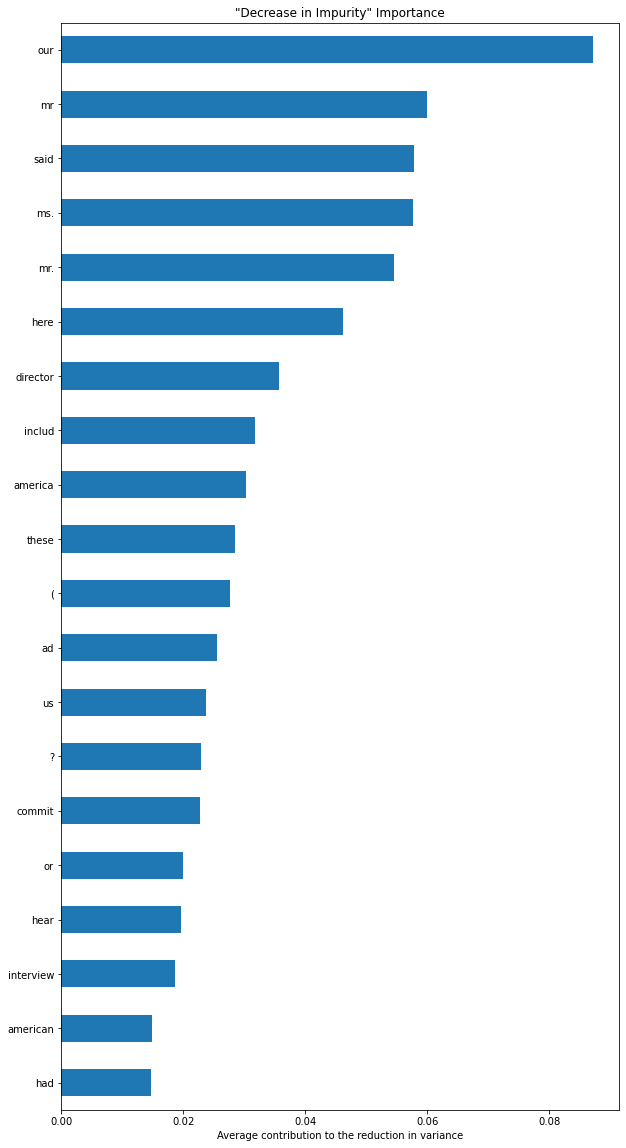

In [270]:
%%time
print(datetime.datetime.now())
feat_scores = pd.Series(feature_import,
                           index=feat_names)
feat_scores = feat_scores.sort_values()
ax = feat_scores[-20:].plot(kind='barh', figsize=(10,20))
ax.set_title('"Decrease in Impurity" Importance')
ax.set_xlabel('Average contribution to the reduction in variance');

In [271]:
%%time
print(datetime.datetime.now())
r = permutation_importance(rf_clf, X_test.toarray(), y_test, n_repeats=30, random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{feat_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

2020-12-04 11:38:26.606055
said    0.027 +/- 0.006
ad      0.008 +/- 0.004
season  0.006 +/- 0.002
america 0.005 +/- 0.003
she     0.001 +/- 0.001
list    0.001 +/- 0.000
CPU times: user 3min 30s, sys: 2.42 s, total: 3min 33s
Wall time: 3min 34s


In [272]:
feat_scores[-60:]

all          0.002366
need         0.002820
human        0.002865
been         0.002880
[            0.003034
polit        0.003133
even         0.003244
my           0.003291
without      0.003406
team         0.003451
polici       0.003479
everi        0.003879
power        0.004118
we           0.004338
chief        0.004465
last         0.004493
citi         0.004516
week         0.004556
are          0.004734
)            0.005164
reason       0.005229
monday       0.005247
after        0.006126
onli         0.006133
statement    0.006718
offici       0.007618
wednesday    0.007896
ms           0.007923
actual       0.008484
he           0.009352
think        0.009733
ani          0.010241
season       0.011609
fact         0.011707
two          0.012274
today        0.012303
what         0.012754
should       0.012935
tuesday      0.014119
:            0.014292
had          0.014805
american     0.014854
interview    0.018677
hear         0.019588
or           0.019946
commit    